In [1]:
from qalcore.qiskit.vqfd.vqees import VQAP_IE, VQEES
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.quantum_info import Statevector
from qiskit import Aer
import numpy as np

In [2]:
nqbits = 3
size = 2**nqbits

In [9]:
# define the initial condition
x = np.linspace(0,1,size+2)
dx = x[1]-x[0]
u0 = np.sin(np.pi*x)[1:-1]
u0 /= np.linalg.norm(u0)

In [ ]:
# define the time steps
dt = 0.01
delta_x = dt/dx/dx

In [10]:
# compute the VQLS solution
ansatz = RealAmplitudes(nqbits, entanglement="full", reps=3, insert_barriers=False)
vqap = VQAP_IE(
    delta_x= delta_x,
    ansatz=ansatz,
    boundary='Dirichlet',
    optimizer=COBYLA(maxiter=200, disp=True),
    quantum_instance=Aer.get_backend("aer_simulator_statevector"),
)

In [11]:
# solve with vqap
vqees = VQEES(vqap)
solution = vqees.solve(u0, tmax = 0.1 dt=dt)

0


/home/nico/miniconda3/envs/test_qalcore/lib/python3.8/site-packages/scipy/optimize/_cobyla_py.py:273: ComplexWarning: Casting complex values to real discards the imaginary part
  xopt, info = cobyla.minimize(calcfc, m=m, x=np.copy(x0), rhobeg=rhobeg,



   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =  200   F =-1.430358E-01    MAXCV = 0.000000E+00
   X = 3.093939E-02  -2.198688E+00   2.347095E+00   1.561557E+00  -8.054361E-01
       1.928710E+00  -1.894439E+00   1.955355E+00  -1.748264E+00   2.640764E+00
      -9.569196E-01   3.061099E+00
1

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =  200   F =-1.778359E-01    MAXCV = 0.000000E+00
   X =-1.432474E+00  -6.421890E-01   8.459900E-01  -7.554346E-01   3.662625E+00
       8.403747E-01  -1.071505E+00   2.511153E-01  -8.876786E-01   1.958141E+00
       4.479237E+00  -1.165457E+00
2

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

3
   NFVALS =  200   F =-1.782814E-01    MAXCV = 0.000000E+00
   X =-1.264424E+00   1.423378E+00   1.531451E+00   8.281044E-01   3.007585E+00
       3.028427E-01   2.442947E+00  -1.202558E+00   2.067987E+00  -1.416959E+00
       1.062891E+00   2.006972

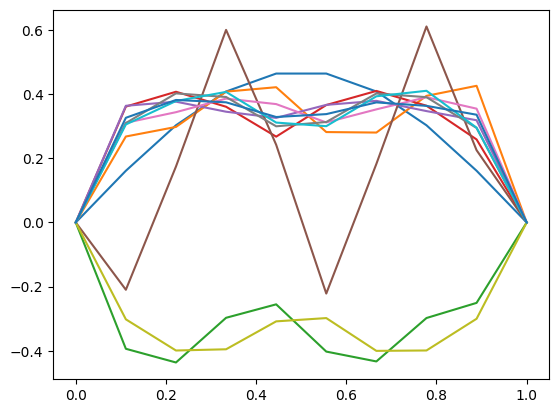

In [12]:
import matplotlib.pyplot as plt
for s in solution:
    plt.plot(x, np.insert(s, [0,2**nqbits], [0,0]))   